___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [5]:
!python --version

Python 3.9.7


In [6]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [9]:
import tensorflow as tf
tf.__version__

'2.9.1'

# Keras Syntax Basics

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [11]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [14]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [15]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


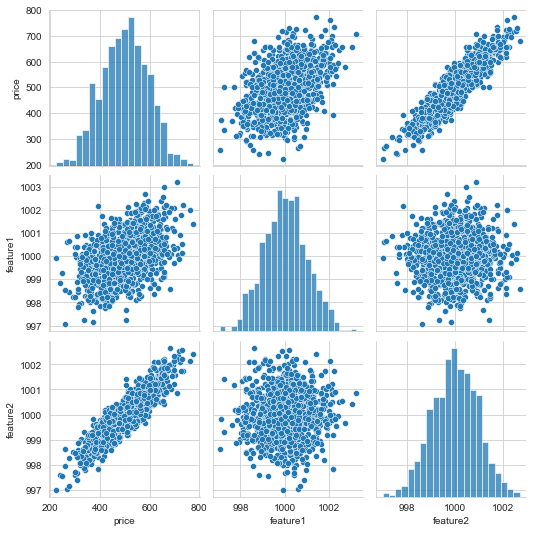

In [18]:
sns.pairplot(df);

In [19]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# X = df[['feature1', 'feature2']].values
# y = df['price'].values

In [22]:
X = df[['feature1', 'feature2']]
y = df['price']

In [23]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [24]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [26]:
X_train.shape

(700, 2)

In [27]:
X_test.shape

(300, 2)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [30]:
scaler = MinMaxScaler()

In [31]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [32]:
import tensorflow as tf

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [34]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [35]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

In [36]:
X_train.shape

(700, 2)

In [37]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [38]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.83497286, -0.7016063 ,  0.3022983 ,  0.39586687],
        [ 0.85000515,  0.2893808 ,  0.720433  ,  0.03870153]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.7098635 , -0.33262855, -0.8588592 ,  0.8296091 ],
        [-0.7184562 , -0.10260832, -0.80175567,  0.59907514],
        [-0.12807143,  0.38373917,  0.46117646, -0.12655544],
        [-0.72548527, -0.328843  ,  0.44235724,  0.33484048]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.4012783 ,  0.29509133, -0.4563689 ,  0.51980096],
        [-0.3949694 ,  0.0443303 , -0.23347872,  0.43642384],
        [-0.83944607,  0.09413534, -0.2157

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [41]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [42]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256962.5312
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256857.7656
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256771.6875
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256695.8125
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256638.3125
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256604.1562
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256580.2344
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256557.9375
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 256535.9844
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 256514.1250
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 256492.1875
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.6956234 , -0.75563496,  0.44954896,  0.2606331 ],
        [ 0.71375114,  0.2332134 ,  0.86468273, -0.09269658]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([-0.13339469, -0.05615837,  0.14149247, -0.1290908 ], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.7098635 , -0.37590224, -0.8651686 ,  0.69270223],
        [-0.7184562 , -0.12612264, -0.8049178 ,  0.55403155],
        [-0.12807143,  0.33881617,  0.45486537, -0.2687591 ],
        [-0.72548527, -0.335689  ,  0.44235724,  0.21788523]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.        , -0.0443504 , -0.00631151, -0.13504353], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.4012783 ,  0.29509133, -0.4563689 ,  0.51980096],
        [-0.3949694 ,  0.0348546

In [45]:
model.history.history

{'loss': [256962.53125,
  256857.765625,
  256771.6875,
  256695.8125,
  256638.3125,
  256604.15625,
  256580.234375,
  256557.9375,
  256535.984375,
  256514.125,
  256492.1875,
  256470.375,
  256448.484375,
  256426.609375,
  256404.703125,
  256382.8125,
  256360.984375,
  256339.046875,
  256317.25,
  256295.3125,
  256273.46875,
  256251.59375,
  256229.671875,
  256207.796875,
  256185.96875,
  256164.0625,
  256142.21875,
  256120.359375,
  256098.46875,
  256076.59375,
  256054.765625,
  256032.890625,
  256011.015625,
  255989.1875,
  255967.34375,
  255945.390625,
  255923.546875,
  255901.734375,
  255879.796875,
  255857.96875,
  255836.09375,
  255814.234375,
  255792.546875,
  255770.671875,
  255748.75,
  255726.875,
  255705.078125,
  255683.078125,
  255661.296875,
  255639.46875,
  255617.640625,
  255595.71875,
  255573.9375,
  255552.109375,
  255530.28125,
  255508.40625,
  255486.609375,
  255464.703125,
  255442.859375,
  255421.046875,
  255399.203125,
  25537

In [46]:
pd.DataFrame(model.history.history)

,loss
0,256962.531
1,256857.766
2,256771.688
3,256695.812
4,256638.312
...,...
245,251375.719
246,251354.109
247,251332.391
248,251310.719


<AxesSubplot:>

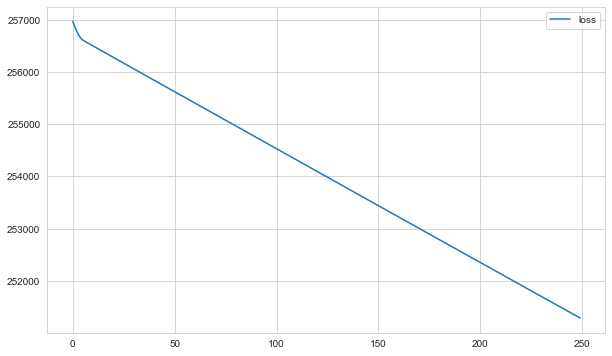

In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

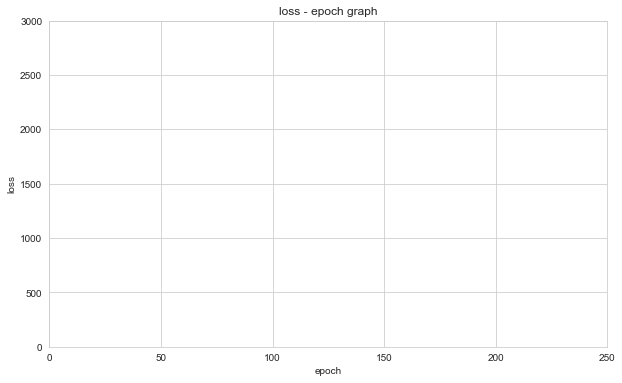

In [48]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [50]:
model.evaluate(X_train, y_train, verbose=0)

251277.640625

In [51]:
model.evaluate(X_test, y_test, verbose=0)

253687.765625

In [52]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [53]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
323,367.792,5.506
244,551.560,5.506
227,449.458,5.506
721,571.706,5.506
942,560.382,5.506
902,656.655,5.506
613,497.465,5.506
158,377.570,5.506
678,584.381,5.506
697,498.190,5.506


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

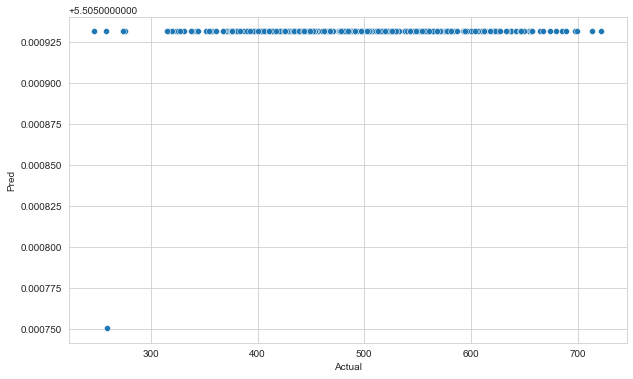

In [54]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [55]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [56]:
eval_metric(y_test, y_pred)

r2_score: -27.854282229138036 
mae: 494.86940870007646 
mse: 253687.7630413363 
rmse: 503.67426283396327


## Final Model and Model Deployment

### Final Model Training

In [57]:
scaler = MinMaxScaler().fit(X)

In [58]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [59]:
X_scaled = scaler.transform(X)

In [60]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 258423.3906
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 257876.4062
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 257529.3125
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 257347.1562
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 257230.0938
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 257128.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 256970.0469
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 256725.4844
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 256373.7344
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 255898.7656
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 255285.3281
Epoch 12/250
32/32 [==============================] - 0s 1ms/st

### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code.

In [61]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [62]:
#final_model.save("model_fake_reg") 

### Loading Model

In [63]:
from tensorflow.keras.models import load_model

In [64]:
model_fake_reg = load_model('model_fake_reg.h5')

In [65]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [66]:
sample = [[998, 1000]]

In [67]:
sample_scaled = scaler_fake_reg.transform(sample)

In [68]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 66ms/step


array([[419.16818]], dtype=float32)

## Prediction-2

In [69]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [70]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [71]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [72]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 21ms/step


array([[379.03598],
       [330.75375],
       [282.47153],
       [234.18929],
       [185.90706]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___